# Assignment 5
## Anton Franzluebbers

Imports:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

## Part 1: Linear Regression

Import the data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
4893     11.2        6  white  
4894      9.6        5  white  
4895      9.4        6  white  
4896     12.8        7  white  
4897     11.8        6  white  

[6497 rows x 13 columns]

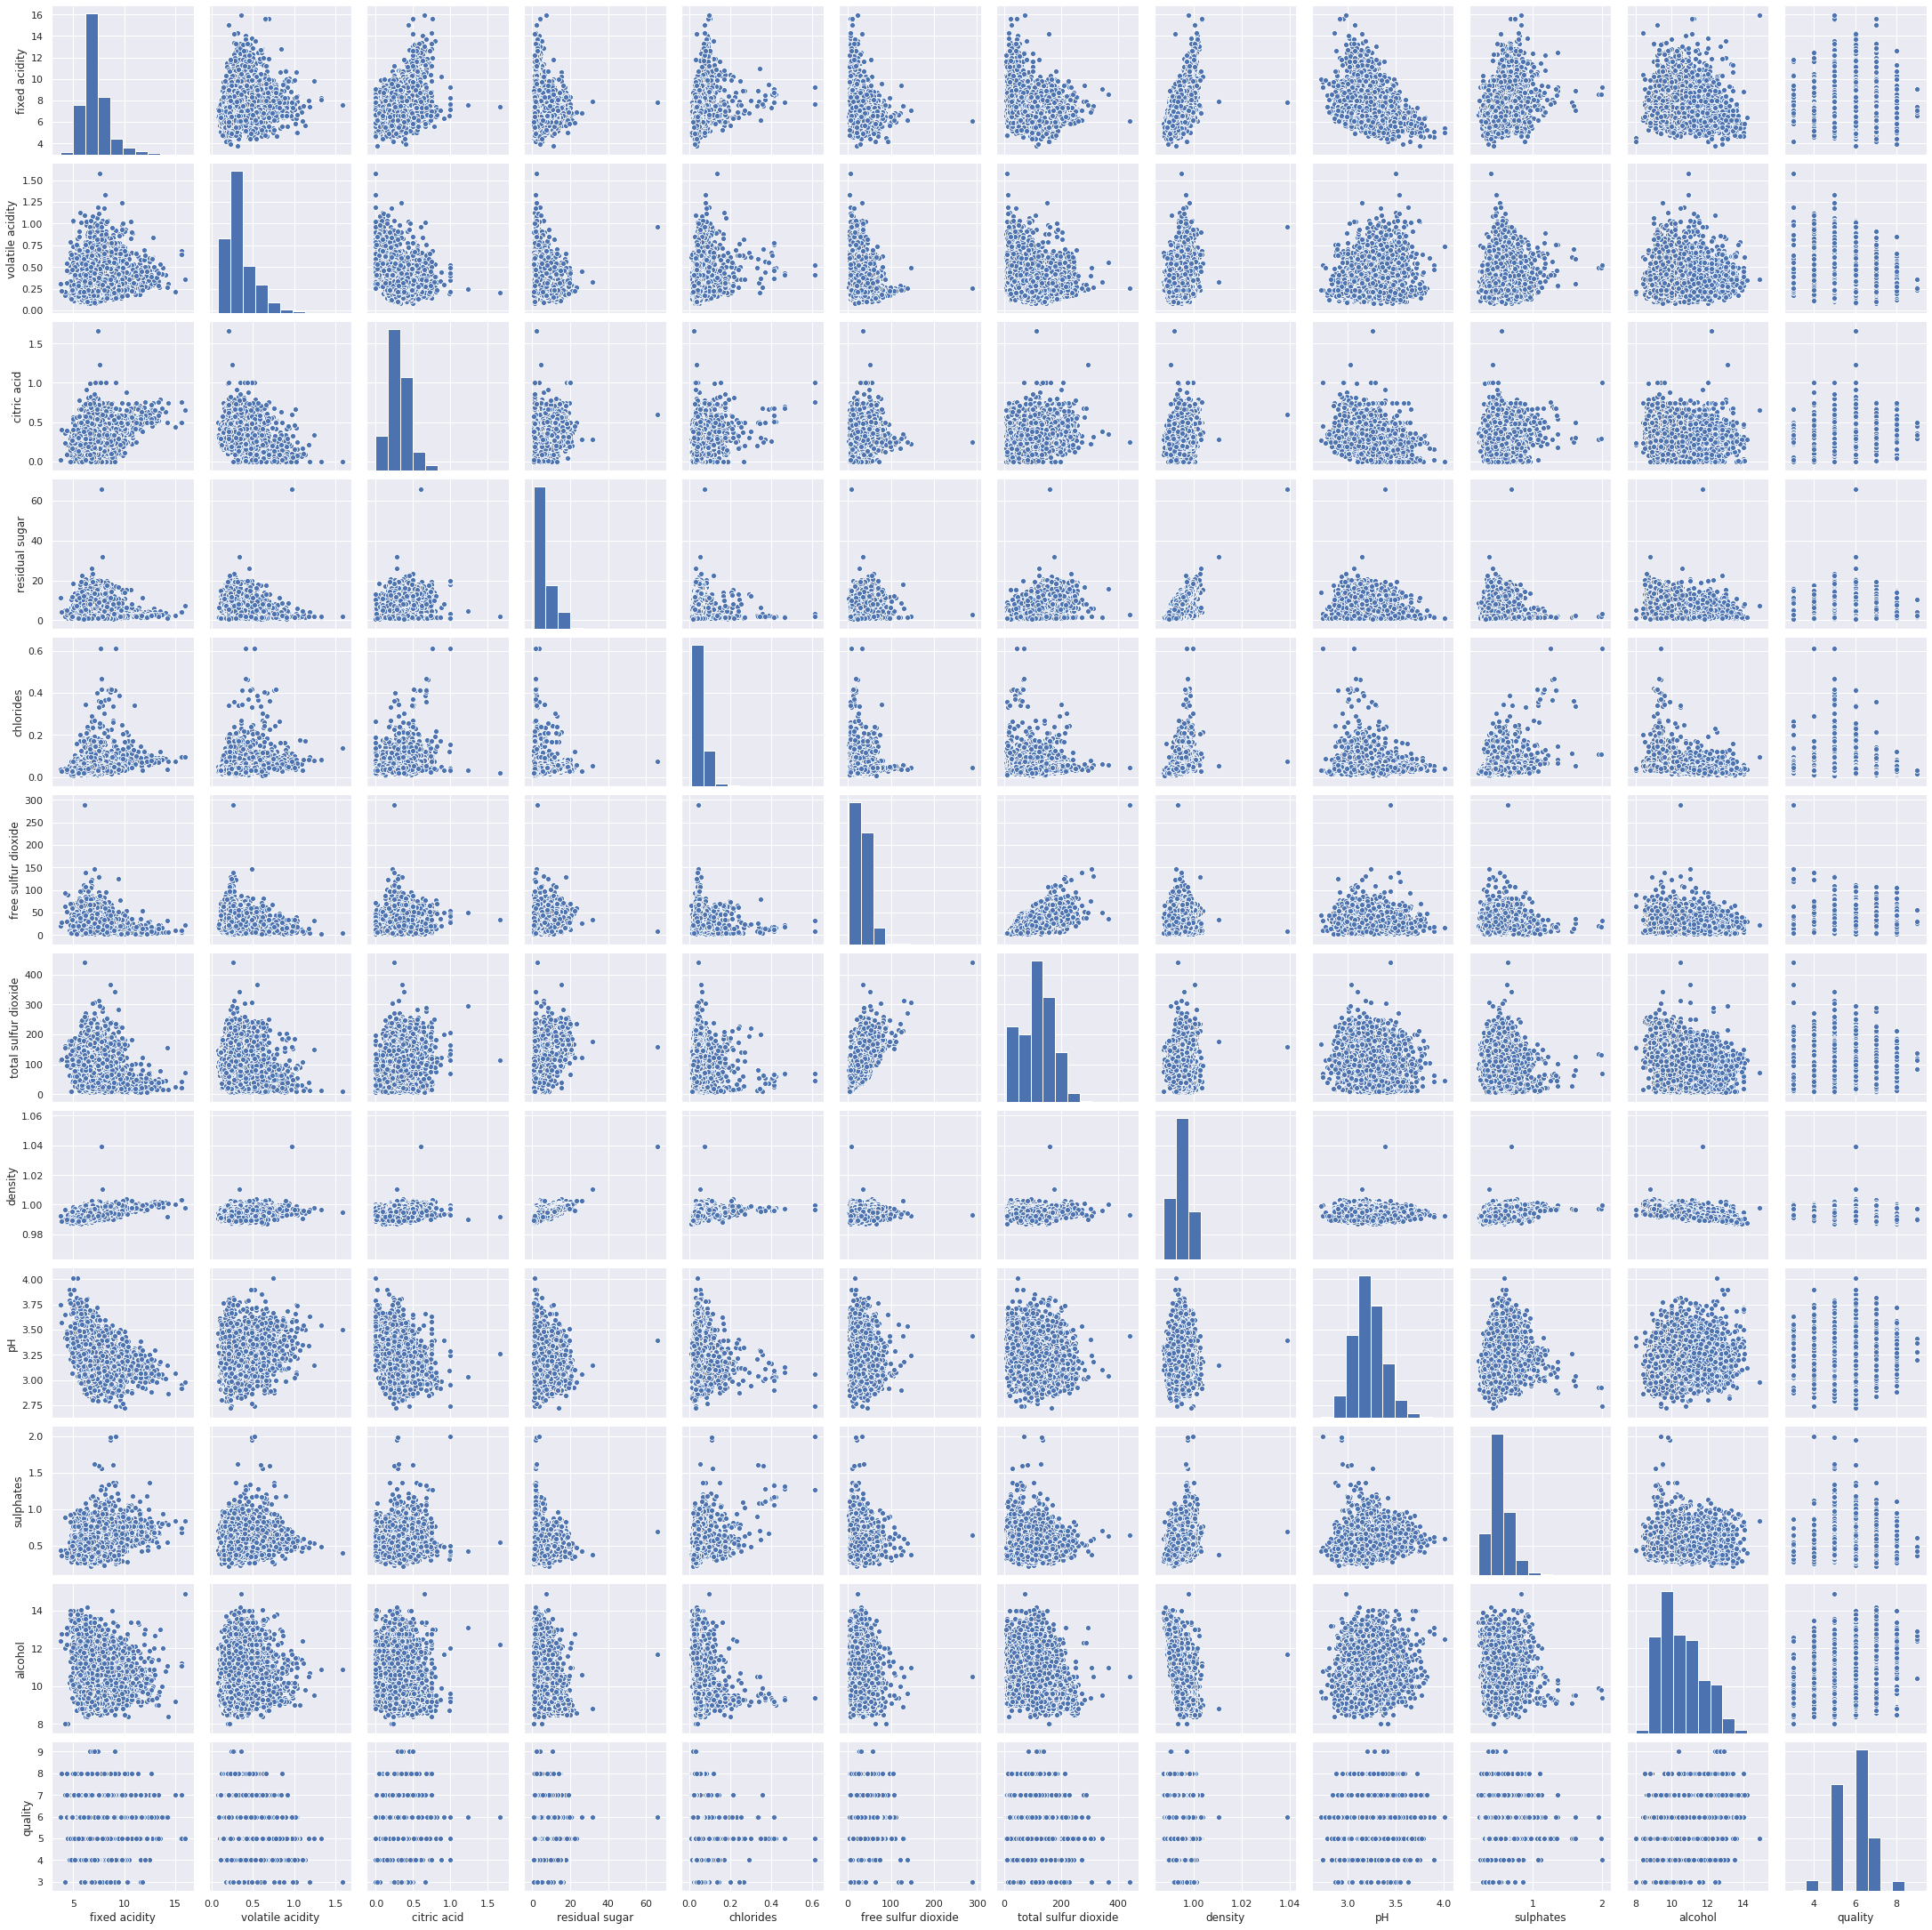

In [2]:
red_wine = pd.read_csv("winequality-red.csv", delimiter=";")
white_wine = pd.read_csv("winequality-white.csv", delimiter=";")

# add labels
red_wine["color"] = "red"
white_wine["color"] = "white"

# combine the datasets
all_wine = red_wine.append(white_wine)
display(all_wine)
sns.pairplot(all_wine)

White Data -> Quality

'r2 = 0.2818703641332847'

'rmse = 0.7504359153109994'

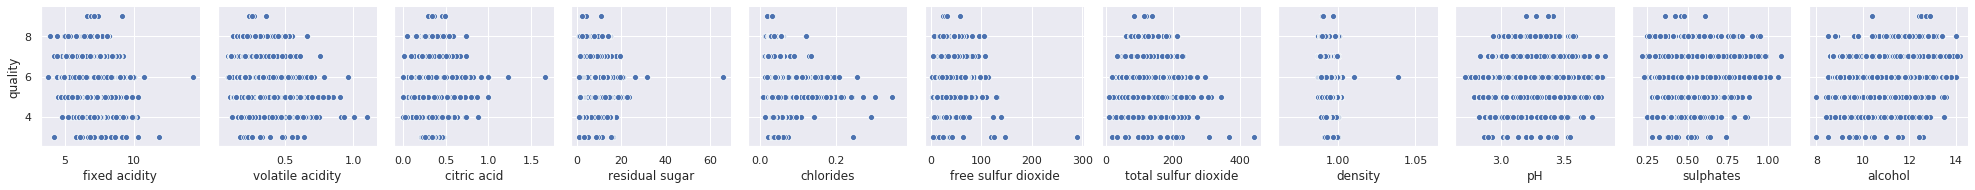

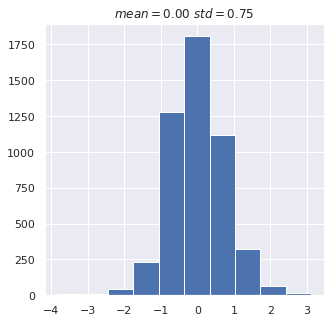

In [3]:
# Using multiple Linear Regression on all variables against quality

x = white_wine.drop(columns=["quality", "color"])
y = white_wine.quality

# Create a pairplot for just the quality row
sns.pairplot(data=white_wine, y_vars=["quality"], x_vars=x.columns)


lr = LinearRegression()
lr_fit = lr.fit(x, y)

# calculate stats
y_pred = lr_fit.predict(x)
error = y - y_pred
r2 = lr_fit.score(x, y)
display("r2 = " + str(r2))
rmse = np.sqrt(metrics.mean_squared_error(y,y_pred))
display("rmse = " + str(rmse))

# visualize
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(111)
ax.hist(error)
ax.set_title(f"$mean={np.mean(error):.2f}\ std={np.std(error):.2f}$");

Red Data -> Quality

'r2 = 0.3605517030386882'

'rmse = 0.6455750670692045'

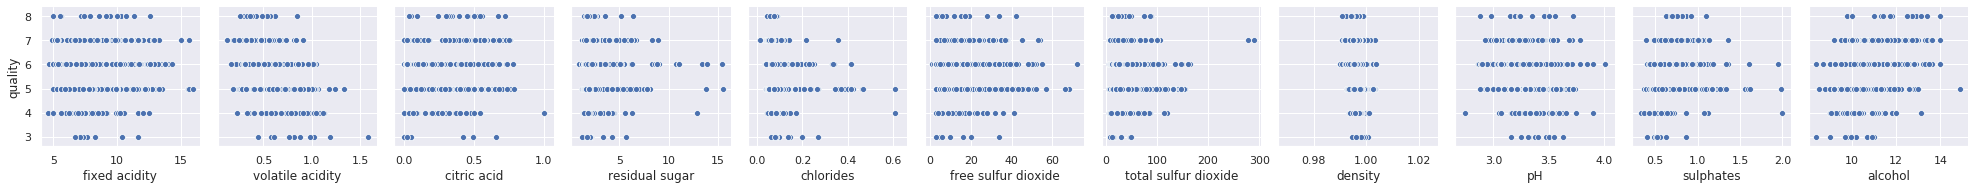

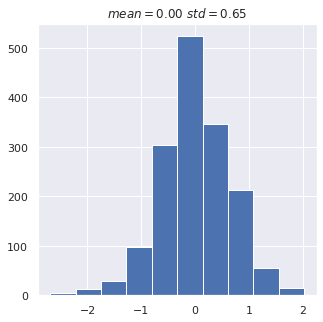

In [4]:
# Using multiple Linear Regression on all variables against quality

x = red_wine.drop(columns=["quality", "color"])
y = red_wine.quality

# Create a pairplot for just the quality row
sns.pairplot(data=red_wine, y_vars=["quality"], x_vars=x.columns)


lr = LinearRegression()
lr_fit = lr.fit(x, y)

# calculate stats
y_pred = lr_fit.predict(x)
error = y - y_pred
r2 = lr_fit.score(x, y)
display("r2 = " + str(r2))
rmse = np.sqrt(metrics.mean_squared_error(y,y_pred))
display("rmse = " + str(rmse))

# visualize
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(111)
ax.hist(error)
ax.set_title(f"$mean={np.mean(error):.2f}\ std={np.std(error):.2f}$");

All Data -> Quality

'r2 = 0.29213688504020474'

'rmse = 0.7346532973303374'

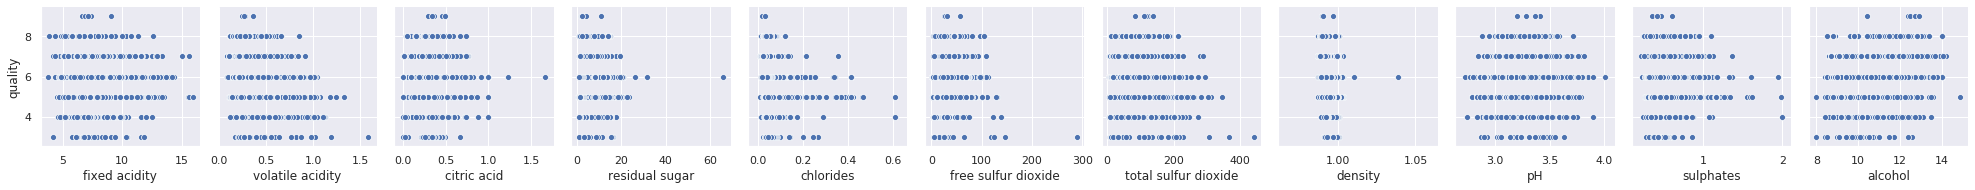

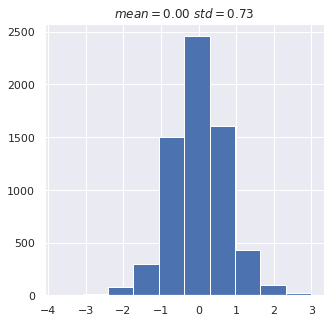

In [5]:
# Using multiple Linear Regression on all variables against quality

x = all_wine.drop(columns=["quality", "color"])
y = all_wine.quality

# Create a pairplot for just the quality row
sns.pairplot(data=all_wine, y_vars=["quality"], x_vars=x.columns)


lr = LinearRegression()
lr_fit = lr.fit(x, y)

# calculate stats
y_pred = lr_fit.predict(x)
error = y - y_pred
r2 = lr_fit.score(x, y)
display("r2 = " + str(r2))
rmse = np.sqrt(metrics.mean_squared_error(y,y_pred))
display("rmse = " + str(rmse))

# visualize
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(111)
ax.hist(error)
ax.set_title(f"$mean={np.mean(error):.2f}\ std={np.std(error):.2f}$");

## Part 2: Logistic Regression

Import the data:

In [6]:
haberman = pd.read_csv("haberman.data", names=["age", "year", "positives", "survived"])
haberman.survived = haberman.survived - 1
display(haberman)

age  year  positives  survived
0     30    64          1         0
1     30    62          3         0
2     30    65          0         0
3     31    59          2         0
4     31    65          4         0
..   ...   ...        ...       ...
301   75    62          1         0
302   76    67          0         0
303   77    65          3         0
304   78    65          1         1
305   83    58          2         1

[306 rows x 4 columns]

coeff = [ 0.01988257 -0.00975411  0.08838822]
intercept = -1.8623356854553177
r2 = 0.7483660130718954
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       225
           1       0.58      0.17      0.27        81

    accuracy                           0.75       306
   macro avg       0.67      0.56      0.56       306
weighted avg       0.72      0.75      0.69       306



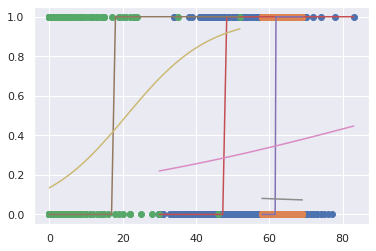

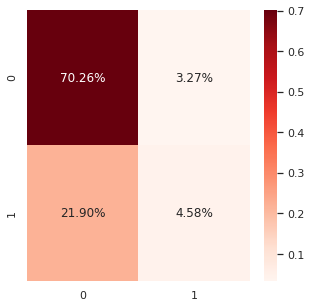

In [7]:
x = haberman.drop(columns=["survived"])
y = haberman.survived

plt.plot(x,y,"o")

logreg = LogisticRegression(solver="lbfgs")
logreg.fit(x,y)
y_pred = logreg.predict(x)
x2 = np.linspace(np.min(x),np.max(x),50)
y_guess = 1 / (1+np.exp(-(logreg.coef_[0]*x2+logreg.intercept_)))
y2 = logreg.predict(x2)
plt.plot(x2,y2);
plt.plot(x2,y_guess);

# show confusion matrix
f2 = plt.figure(figsize=(5,5))
cf_matrix = metrics.confusion_matrix(y,y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap="Reds")

# show stats
print("coeff = " + str(logreg.coef_[0]))
print("intercept = "+ str(logreg.intercept_[0]))
r2 = logreg.score(x,y)
print("r2 = " + str(r2))
print(metrics.classification_report(y,y_pred))

# The ez way
#sns.regplot(data=haberman, x="positives", y="survived", logistic=True)